In [1]:
import pandas as pd
import numpy as np

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
#simple descriptive analysis

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df["alcohol"].mean()

10.491800831149511

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2c8c48748>]],
      dtype=object)

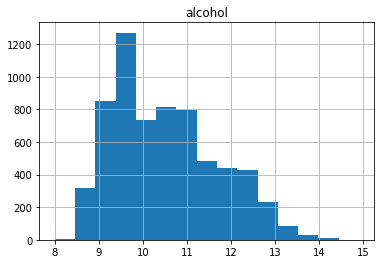

In [7]:
#histogram

df.hist(column='alcohol', bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2c919cda0>]],
      dtype=object)

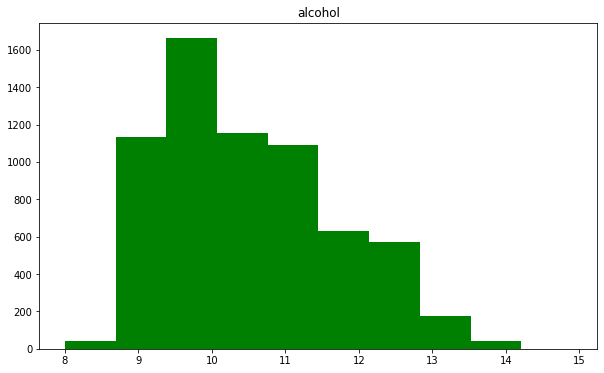

In [8]:
#Customizing plots
df.hist(column='alcohol', bins=10, grid=False, figsize=(10,6), color='green')


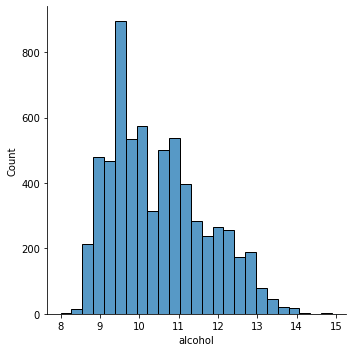

In [9]:
# using seaborn

import seaborn as sns

sns.displot(df['alcohol'], bins=25, kde=False)

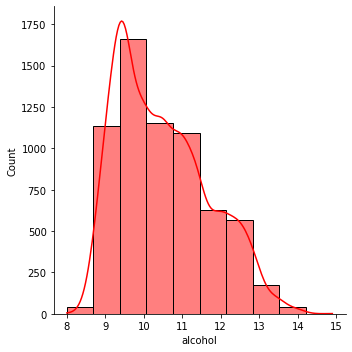

In [10]:
sns.displot(df.alcohol, bins=10, kde=True, color="red")

In [12]:
df["alcohol"].value_counts()

9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
11.850000      1
14.050000      1
14.900000      1
12.066667      1
11.733333      1
Name: alcohol, Length: 111, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


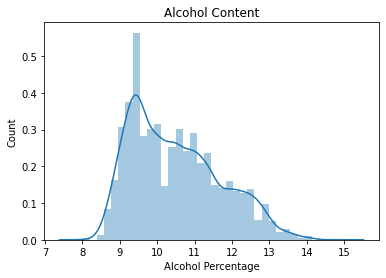

In [13]:
#Styling and axis

#labeling axis

import matplotlib.pyplot as plt
_ = sns.distplot(df.alcohol)
_ = plt.xlabel('Alcohol Percentage')
_ = plt.ylabel('Count')
_ = plt.title('Alcohol Content')

plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


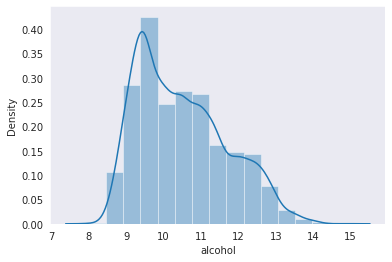

In [16]:
#controlling style

sns.set_style("dark") #background
sns.distplot(df.alcohol, bins=15)

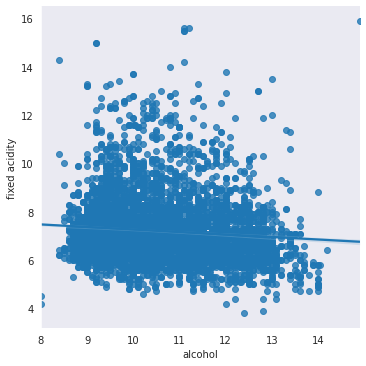

In [17]:
#scatter plots
sns.lmplot(x='alcohol', y='fixed acidity', data=df)

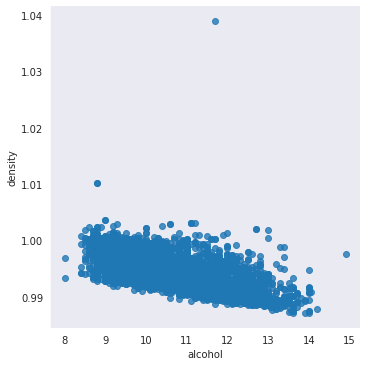

In [19]:
sns.lmplot(x='alcohol', y='density', data=df, fit_reg=False)

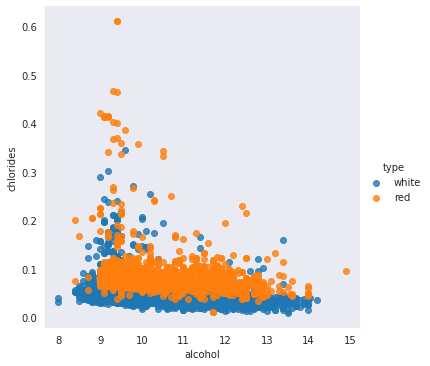

In [22]:
#Scatterplot arguments
sns.lmplot(x='alcohol', y='chlorides', data=df, fit_reg=False, #remove the regression line
           hue="type") #color by quality

In [23]:
#percentiles

print(df["alcohol"].quantile(0.1)) #10% will fall under 9.1
print(df["alcohol"].quantile(0.5))
print(df["alcohol"].quantile(0.9))
print(df["alcohol"].quantile(0.99))

9.1
10.3
12.3
13.4


In [24]:
df["alcohol"].max()

14.9

In [25]:
#quantile range

df["alcohol"].quantile([0.05,0.95])

0.05     9.0
0.95    12.7
Name: alcohol, dtype: float64

0.25     9.5
0.75    11.3
Name: alcohol, dtype: float64


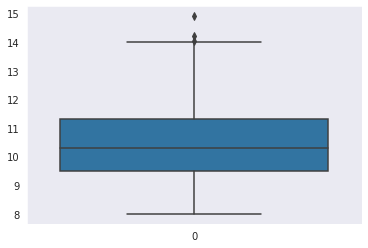

In [26]:
#Boxplots and outliers

print(df["alcohol"].quantile(([0.25,0.75])))
sns.boxplot(data=df["alcohol"])

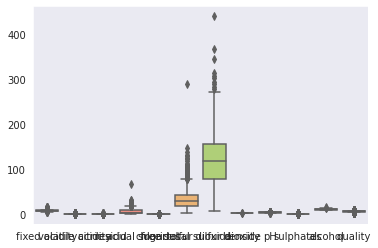

In [28]:
sns.boxplot(data=df, palette="Set3")

In [29]:
#maximum = q3 + 1.5*IQR
#minimum = q1 - 1.5*IQR

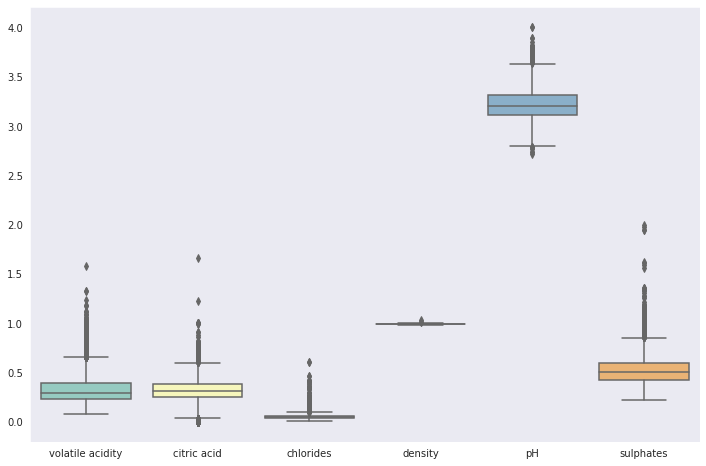

In [30]:
from matplotlib import pyplot as plt

# Enlarge the plot
plt.figure(figsize=(12,8))

summary = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality',
                   'residual sugar', 'fixed acidity', 'alcohol'], axis=1)
sns.boxplot(data=summary, palette="Set3")

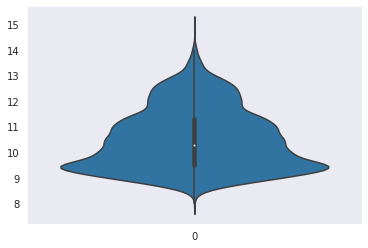

In [31]:
#violin plots

sns.violinplot(data=df["alcohol"])

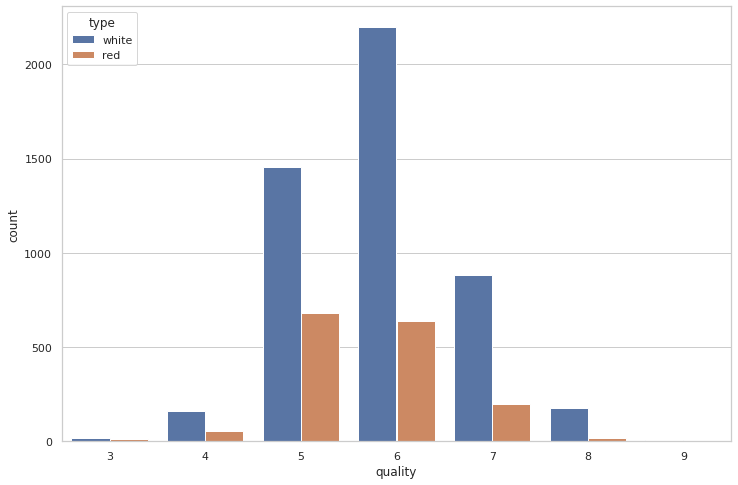

In [40]:
#bar plot

plt.figure(figsize=(12,8))
sns.countplot(x='quality', data=df, hue="type")

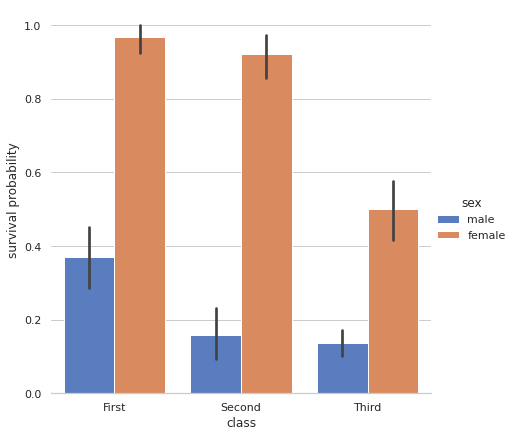

In [39]:
# Titanic Example

sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


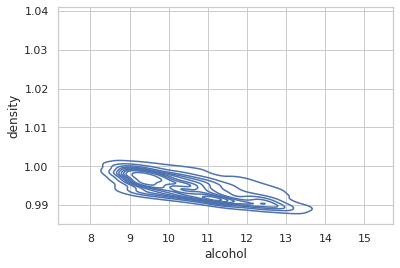

In [41]:
#density plot
sns.kdeplot(df.alcohol, df.density)

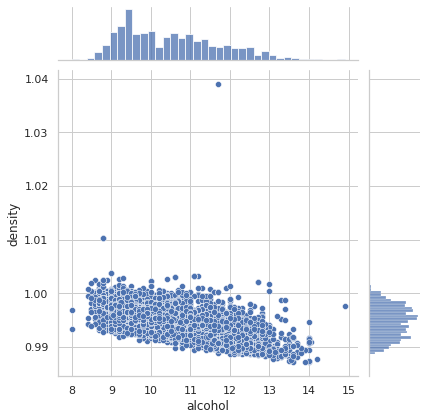

In [42]:
#joint distribution plot

sns.jointplot(x='alcohol', y='density', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


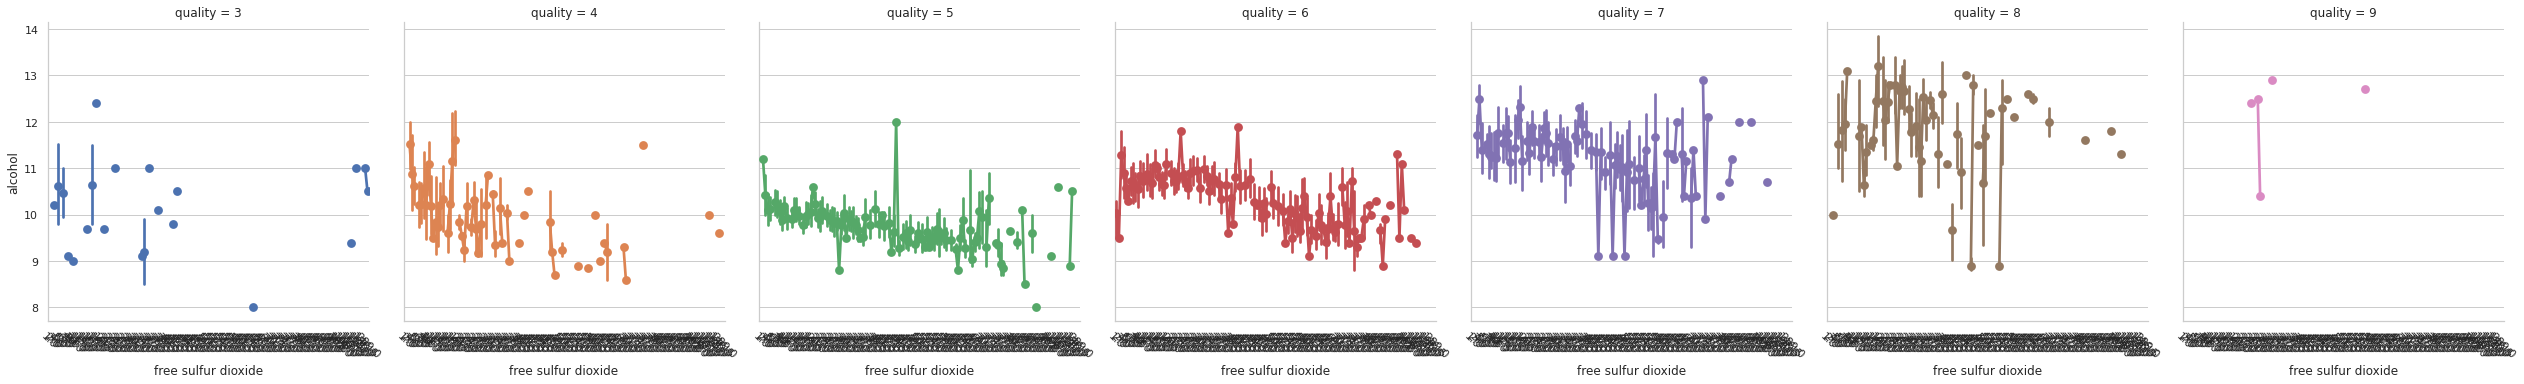

In [43]:
#factor plots and bee awarm plots
g = sns.factorplot(x='free sulfur dioxide',
                   y='alcohol',
                   data=df,
                   hue='quality', #color by stage
                   col='quality', #separated by stage
                   kint='poin') #swarmplot

g.set_xticklabels(rotation=-45)

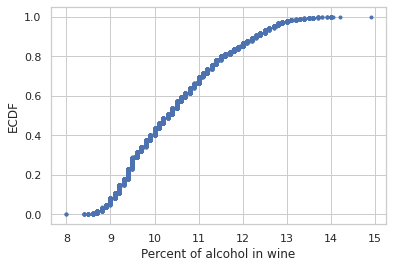

In [44]:
#Empirical cumulative distribution function (ECDF)

import numpy as np

x= np.sort(df['alcohol'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x,y, marker='.',linestyle="none")
plt.margins(0.05)
_ = plt.xlabel('Percent of alcohol in wine')
_ = plt.ylabel('ECDF')
plt.grid(True)
plt.show()


In [45]:
print(df['alcohol'].quantile([0.2, 0.8]))

0.2     9.4
0.8    11.5
Name: alcohol, dtype: float64
